# A neural network from scratch
The problem you solved in the last notebook was linearly separable. In this notebook, we will look at a famous problem that is not linearly separable: the **XOR problem**. We cannot solve it with a single neuron, but need a network of three neurons, of which two of them are in th network's *hidden layer*.

Let's load the data set first:

In [53]:
source("01-helpers.R")
data <- dataset_xor()

## Exercise 1
Extract the input matrix `X` and the labels `y` from the `data` object. Inspect them and their dimensions. Do they make sense to you?

In [54]:
X <- data$X
y <- data$y
X
y
dim(X) # four points, 2 input variables, x1 and x2
length(y) # the output (labels)

0,0
0,1
1,0
1,1


[1] 0 1 1 0
Levels: 0 1

[1] 4 2

[1] 4

Let's plot the data set:

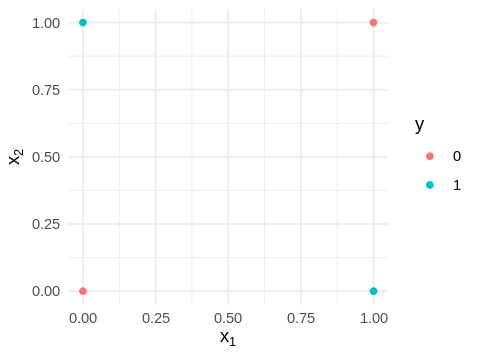

In [55]:
plot_dataset(X, y)

We need a hidden layer with two neurons to solve this problem. The entire network will look like this:

![XOR problem network](images/hidden-layer-neurons.png)

This may look complicated, but, like the network in the first notebook, we will 

In the previous notebook, you implemented a `neuron` function in the last notebook, looking like this:

In [5]:
sigmoid <- function(x) {
    1 / (1 + exp(-x))
}

neuron <- function(X) {
    sigmoid(w %*% t(X) + b)
}

The weights in this function are given as a vector `w`. In this way, each point $(x_1, x_2)$ is converted to the output of a single neuron. Since we have two neurons, the output of the multiplication step should be **two** numbers. We accomplish this by taking the weights as a matrix `W`, instead of as a vector.

## Exercise 2
Create the weight matrix `W` such that $\mathbf{Z} = \mathbf{W} \mathbf{X}^\top $ will look as follows: 

$$
\mathbf{Z} = \mathbf{W} \mathbf{X}^\top =
\left(
\begin{array}{cc}
0 & 1 & 1 & 2 \\
0 & 1 & 1 & 2 \\
\end{array}
\right)
$$

Save the output of the multiplication to the variable `Z`.

In [6]:
W <- matrix(c(1, 1, 1, 1), nrow = 2)
W
Z <- W %*% t(X)
Z

1,1
1,1


0,1,1,2
0,1,1,2


## Exercise 3
We will need to add a bias term to each output variable. Since we have two output variables (two columns in `Z`), our bias variable `b` will be a vector instead of a single number like before. Create a bias vector `b` that looks as follows:

$$
\mathbf{b} =
\left(
\begin{array}{c}
0 \\
-1 \\
\end{array}
\right)
$$

In [7]:
b <- c(0, -1)
b

[1]  0 -1

## The `apply` function
We want to apply this bias to each row in `Z`. We will use R's [`apply`](https://www.rdocumentation.org/packages/base/versions/3.5.2/topics/apply) function to do so. As the name suggests, `apply` will apply a function to each element along a certain axis of a tensor. You will supply the input tensor, the axis along which to apply the operation, and the function to apply to it.

Let's look at an example where we solve the addition of the bias term to each column in `Z`:

In [8]:
Z <- apply(Z, 2, function(column) column + b)
Z

0,1,1,2
-1,0,0,1


As you can see, `apply` takes as its input the following parameters:
1. The tensor to which to apply a function
1. The axis along which to apply the function - `1` for rows, `2` for columns, etc.
1. The function to apply to each element

By specifying `2` as the second argument, `apply` will loop to all columns and pass each column to the function you have defined. The function will simply add the bias term `b` to the column and return it.

You will need to use `apply` quite often to transform a tensor in a certain way. You will have some time to practice with it and become familiar with it in the notebooks and the assignments.

We can plot the transformation that the layer applies to the input data:

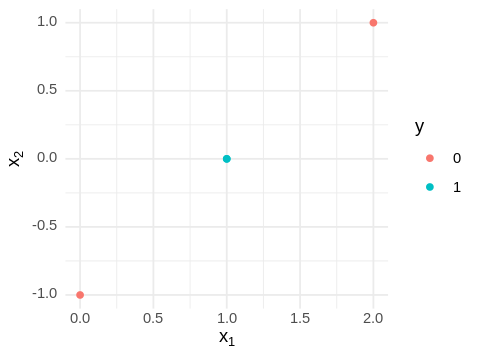

In [9]:
plot_dataset(t(Z), y)  # We need to transpose Z since plot_dataset expects each instance to be a row

As you can see, the problem is still not linearly separable: all instances lie along a line with slope 1, and we cannot draw a straight line across our plot to separate one class from the other. For that, we will need an activation function.

## Exercise 4
Implement the ReLU activation function introduced in the slides and apply it to each row in `Z` with the `apply` function. The ReLU function is given as

$$
\sigma(x) = max(x, 0)
$$

Store the result in a variable called `A`. (`A` for the activation of the hidden layer), like so:

$$
\mathbf{A} = relu(\mathbf{Z})
$$

**Hint**: you cannot use R's `max`, because it will return the maximum across the entire vector. We need an *element-wise* operation, which you can find on the following documentation page: [`Extremes`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/Extremes).

In [10]:
relu <- function(x) {
    pmax(x, 0)
}

A <- apply(Z, 2, relu)
A

0,1,1,2
0,0,0,1


## Exercise 5
Plot `A` together with `y` using the `plot_dataset` helper function. What is the effect of the activation function? How will the activation function allow us to solve this non-linear problem?

**Hint**: remember that `plot_dataset` expects each instance (point) as a row, and not a column.

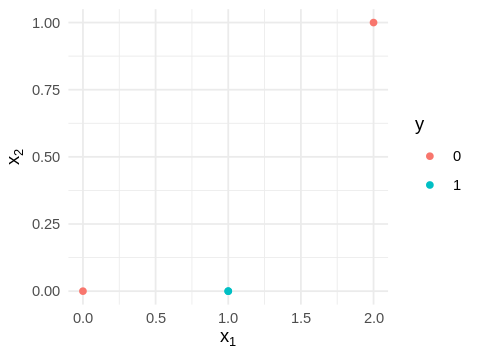

In [11]:
plot_dataset(t(A), y)

We're nearly there! We will be looking at probabilities and decision boundaries and We have the result of the **hidden layer** in the variable `A`, and need to transform it into probabilities for each point in our input data, that is: a vector of length 4.

## Exercise 6
Create a vector `w` that will transform `A` into a vector of length 4. Set all elements of `w` to `1` for now, so that the following equation holds:

$$
\hat{y} = \mathbf{w} \mathbf{A} = \left(
\begin{array}{c}
0 & 1 & 1 & 3 \\
\end{array}
\right)
$$

In [12]:
w <- c(1, 1)
w %*% A

0,1,1,3


Of course, these outputs are not probabilities, since we have a `3` as the last element in the output. Typically we want to have a sigmoid activation function or something similar to get the output between 0 and 1.



## Exercise 7
In this case, we are skipping this step. Instead, you will modify `w` yourself such that we solve the problem perfectly. You can plot the resulting decision boundary with your choice of `w` by creating a function that returns the output of the entire network, and feeding it into the `plot_predictions` function.

Create a function called `network` that will return the output of the network as a vector of length 4, by filling in the skeleton below. Modify the values of `w` such that your model classifies all points correctly.

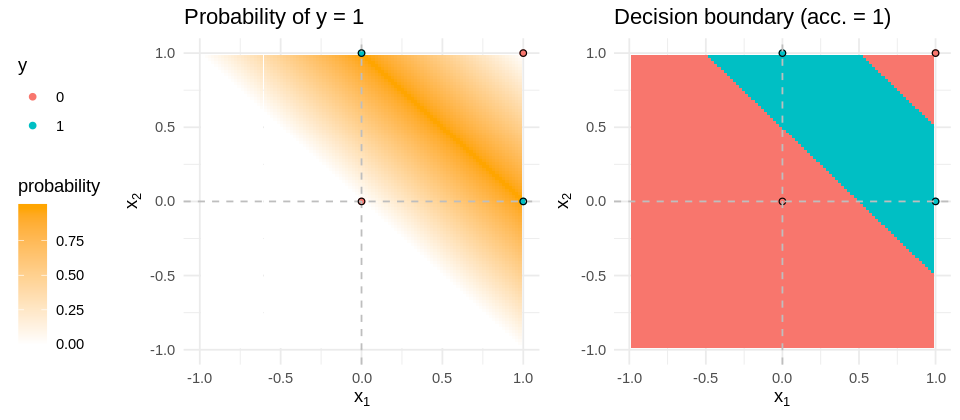

In [13]:
network <- function(X) {
    Z <- apply(W %*% t(X), 2, function(row) row + b)  # bias term stays the same
    A <- apply(Z, 2, relu)
    w <- c(1, -2) 
    w %*% A
}

plot_predictions(X, y, network)

## Exercise 8: bonus
Solve the problem again with the network changed as follows:
1. Instead of a ReLU function in the hidden layer, use a sigmoid function
1. Add a bias term to the output layer called `b_o`
1. Add sigmoid activation to the output layer

**Hints**:
1. We cannot get perfect classifications (0 and 1) in this exercise. Instead, we think of the output as probabilities and **threshold** them: any $y < 0.5$ = class 0 and any $y \geq 0.5$ = class 1.
1. you can use `plot_dataset` to plot the results of the hidden layer like in exercise 5. Finding a decision boundary in this representation space is equivalent to finding the weights and bias of the output layer.

For reference, you can try implementing the network from the following diagram:
![A complete, sigmoid-only network](images/full-exercise.png)

We solve the problem in a number of steps.

The first step is to 'collapse' two points into the same position in the two-dimensional representation space, that is: all points transformed to $(a_1,a_2)$ in the diagram above. Just like the ReLU example in exercise 5, we will have three points left, two of which will lie on a straight line. The two other points are collapsed into this single point by the first layer.

We should have differing values for our biases $b_1$ and $b_2$, otherwise our points will lie on a straight line. The actual values are not so relevant. For $W$, we can make it easy for ourselves and set all weights to 1:

In [215]:
b <- c(-2, 3)
W <- matrix(rep(1, 4), nrow = 2)

In [220]:
Z <- apply(W %*% t(X), 2, function(row) row + b)
A <- apply(Z, 2, sigmoid)
A

0.1192029,0.2689414,0.2689414,0.5000000
0.9525741,0.9820138,0.9820138,0.9933071


Let's plot the result:

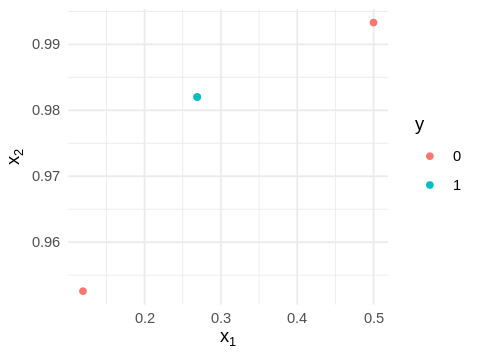

In [219]:
plot_dataset(t(A), y)

As you can see, the two points of class 0 (red) lie on a straight line, the other two points (class 1 - blue) are collapsed into a single point in the representation space. Our job is now to find a decision boundary that separates the two classes.

From the sigmoid function $\sigma$, we know that any for any $z < 0, \sigma(z) < 0.5$ and for any $z > 0, \sigma(z) > 0.5$. This means that need to create $\mathbf{w}$ such that for the two points that belong to class 0 $\mathbf{w} \mathbf{A}$ is smaller than 0. We can solve this problem by solving a system of linear equations. Because we can correct with our bias term $b_o$, we can solve $\mathbf{w}$ to something nicer-looking instead:

$$
\left(
\begin{array}{cc}
0.1192029 & 0.9525741 \\
0.5 & 0.9933071 \\
\end{array}
\right)
\mathbf{w}
=
\left(
\begin{array}{c}
1 \\
1 \\
\end{array}
\right)
$$

**Note**: the values of the matrix are taken from the result of the calculation of `A` a few cells above.

In [251]:
w <- solve(t(matrix(c(A[,1], A[,4]), nrow = 2)), c(1, 1)) 
w

[1] -0.1138169  1.0640299

$\mathbf{w} \mathbf{A}$ gives us:

In [254]:
w %*% A

1,1.014282,1.014282,1


Setting our bias term to correct:

In [257]:
b <- -1.01
y_hat <- sigmoid(w %*% A + -1.01)
y_hat

0.4975,0.5010705,0.5010705,0.4975


Thresholding the resulting probabilities gives us the right predictions:

In [259]:
(y_hat > 0.5) * 1

0,1,1,0
